In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '/home/swei20/PIML_v1/'
import sys
sys.path.insert(0, PROJECT_PATH)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [46]:
from PIML.gateway.loaderIF.baseloaderIF import SpecGridLoaderIF


In [47]:
GRID_PATH="/datascope/subaru/user/swei20/data/pfsspec/import/stellar/grid"
DATA_PATH=os.path.join(GRID_PATH, "bosz_5000_RHB.h5")

In [49]:
loader = SpecGridLoaderIF()

In [50]:
loader.set_data_path(DATA_PATH)

In [51]:
SpecGrid = loader.load()

In [53]:
SpecGrid.flux.shape

(2880, 15404)

# TESTING

In [4]:
from test.testbase import DataInitializer

In [5]:
t = DataInitializer()

In [6]:
t.PARAMS

{'object': {'DATA_PATH': '/datascope/subaru/user/swei20/data/pfsspec/import/stellar/grid/bosz_5000_RHB.h5'},
 'data': {'SKY_PATH': '/home/swei20/PIML_v1/test/testdata/wavesky.npy',
  'Sky': <PIML.crust.data.spec.basesky.StellarSky at 0x7f690df53460>},
 'op': {'box_name': 'R', 'arm': 'RedM', 'step': 10, 'wave_rng': [7100, 8850]},
 'model': {'Resolution': 'Alex', 'Interp': 'RBF'}}

In [37]:
from PIML.gateway.processIF.specgridprocessIF.basespecgridprocessIF import StellarSpecGridProcessIF

In [39]:
SP = StellarSpecGridProcessIF()
SP.interact(t.PARAMS)
Ob = SP.Object

In [40]:
flux = SP.Object.flux

In [32]:
from PIML.surface.posteval.evalstellarprocess import EvalStellarProcess

In [41]:
e = EvalStellarProcess(SP=SP)

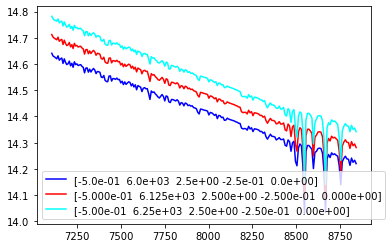

In [42]:
e.eval_interpolator()

In [ ]:
Ob.interpolate(Ob.coordx